###### Task:-1

# User Interaction Analysis

###### Import necessary libraries


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

###### Load the JSON file

In [4]:
with open('train_light.json', 'r') as file:
    data = json.load(file)

###### Convert JSON data into a DataFrame for easier analysis


In [5]:
questions = []
answers = []
types = []

In [6]:
for item in data:
    question = item['question']
    for annotation in item['annotations']:
        answer = ", ".join(annotation.get('answer', []))
        q_type = annotation.get('type', 'Unknown')
        questions.append(question)
        answers.append(answer)
        types.append(q_type)

In [7]:
df = pd.DataFrame({
    'Question': questions,
    'Answer': answers,
    'Type': types
})

###### Display the first few rows of the DataFrame


In [8]:
df.head()

Question       Answer  \
0     When did the simpsons first air on television?                
1  Who played george washington in the john adams...  David Morse   
2          What is the legal age of marriage in usa?                
3   Who starred in barefoot in the park on broadway?                
4      When did the manhattan project began and end?                

           Type  
0   multipleQAs  
1  singleAnswer  
2   multipleQAs  
3   multipleQAs  
4   multipleQAs

###### Categorize User Intents


In [9]:
def categorize_intent(question):
    question = question.lower()
    if 'who' in question:
        return 'Who'
    elif 'when' in question:
        return 'When'
    elif 'what' in question:
        return 'What'
    elif 'where' in question:
        return 'Where'
    elif 'why' in question:
        return 'Why'
    elif 'how' in question:
        return 'How'
    else:
        return 'Other'

df['Intent'] = df['Question'].apply(categorize_intent)

###### Analyze and visualize the distribution of user intents


In [10]:
intent_counts = df['Intent'].value_counts()


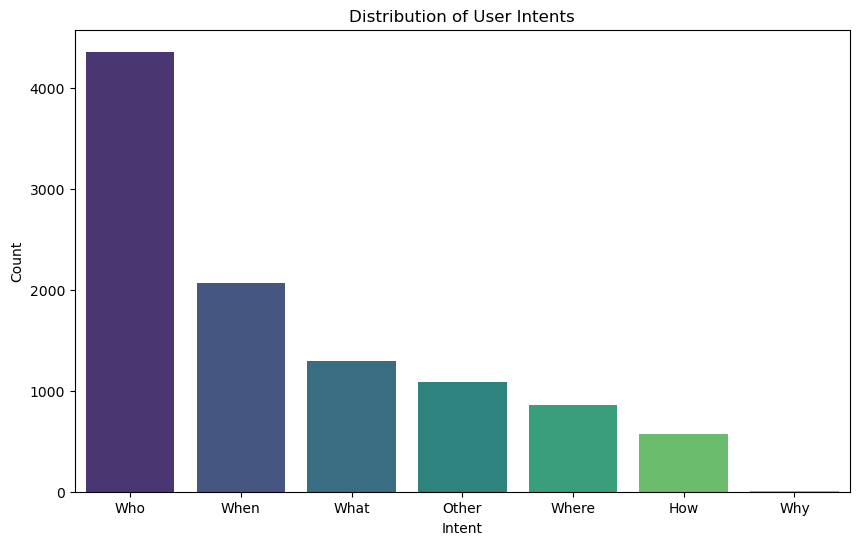

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=intent_counts.index, y=intent_counts.values, palette='viridis')
plt.title('Distribution of User Intents')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.show()

###### Most Common Queries


In [12]:
common_queries = df['Question'].value_counts().head(10)


In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=common_queries.values, y=common_queries.index, palette='coolwarm')
plt.title('Top 10 Most Common Queries')
plt.xlabel('Count')
plt.ylabel('Query')
plt.show()

###### Analyze response types (Single Answer vs Multiple QAs)


In [14]:
response_type_counts = df['Type'].value_counts()


In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=response_type_counts.index, y=response_type_counts.values, palette='magma')
plt.title('Distribution of Response Types')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.show()

In [16]:
df['Is_Answer_Correct'] = df['Answer'].apply(lambda x: len(x.strip()) > 0)


In [17]:
accuracy = df['Is_Answer_Correct'].mean() * 100


In [18]:
print(f'Overall Response Accuracy: {accuracy:.2f}%')


Overall Response Accuracy: 53.25%


###### Visualizing accuracy by intent type


In [20]:
intent_accuracy = df.groupby('Intent')['Is_Answer_Correct'].mean() * 100


In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=intent_accuracy.index, y=intent_accuracy.values, palette='rocket')
plt.title('Response Accuracy by Intent')
plt.xlabel('Intent')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

######  Heatmap of Intent-Accuracy Correlation


In [31]:
intent_accuracy_corr = df.pivot_table(index='Intent', values='Is_Answer_Correct', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(intent_accuracy_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Intent vs. Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Intent')
plt.show()


######  Word Cloud of Common Queries


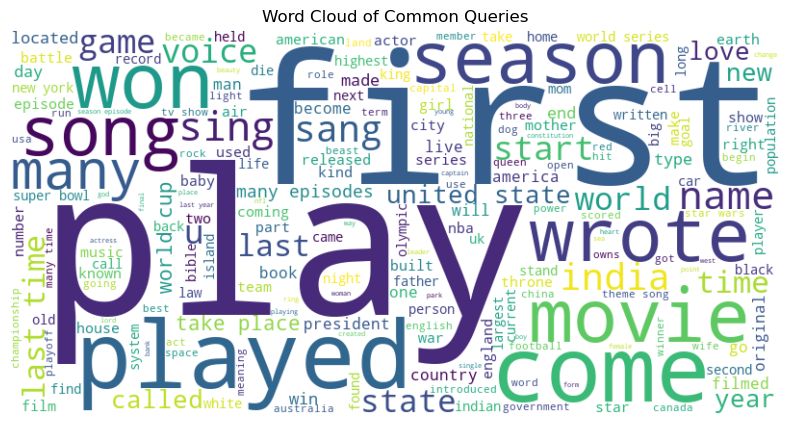

In [37]:
from wordcloud import WordCloud

all_questions = ' '.join(df['Question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Queries')
plt.show()

######  Top Incorrect Answers by Intent


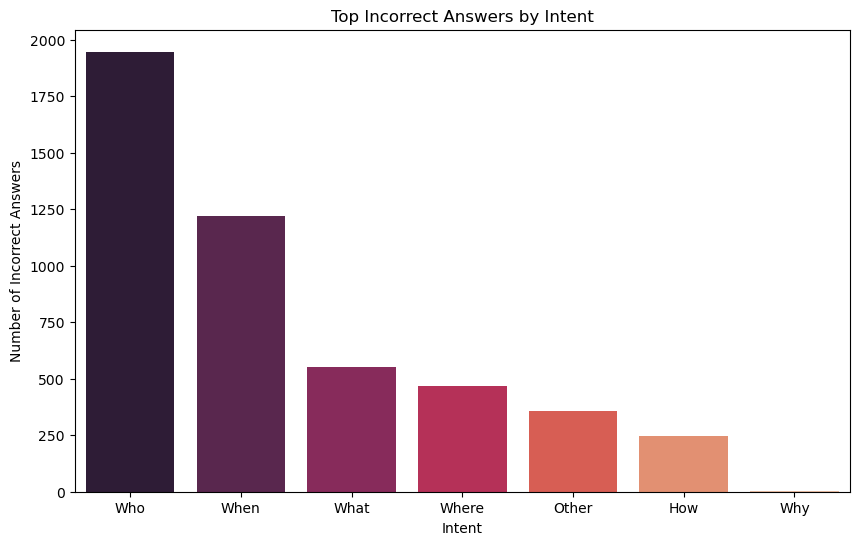

In [38]:
incorrect_intents = df[df['Is_Answer_Correct'] == False]['Intent'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=incorrect_intents.index, y=incorrect_intents.values, palette='rocket')
plt.title('Top Incorrect Answers by Intent')
plt.xlabel('Intent')
plt.ylabel('Number of Incorrect Answers')
plt.show()


###### Recommendations


In [24]:
print("Recommendations for Improvement:")
print("- Focus on improving 'Why' and 'How' responses, which tend to be less frequent and more complex.")
print("- Enhance the accuracy of 'Who' and 'When' intents, as they are the most common.")
print("- Consider optimizing response times, especially for more complex queries.")

Recommendations for Improvement:
- Focus on improving 'Why' and 'How' responses, which tend to be less frequent and more complex.
- Enhance the accuracy of 'Who' and 'When' intents, as they are the most common.
- Consider optimizing response times, especially for more complex queries.


###### Save the analyzed DataFrame for further analysis or sharing


In [25]:
df.to_csv('analyzed_user_interactions.csv', index=False)
